#DecisionTree Classifier

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

import matplotlib.pyplot as plt

In [4]:
# CSV 파일 불러오기
file_path = '/content/drive/MyDrive/Colab Notebooks/2023_2_ML/20232ML_data/unmon.csv'
data = pd.read_csv(file_path)

In [5]:
data = data.T

In [6]:
# 첫 번째 행 삭제
X = data.drop(data.index[0])  # 첫 번째 행 삭제
X.shape

(29000, 36)

In [7]:
# 정답 데이터 y 생성
num_elements = 200
num_repeats = 95

y = np.full(19000, 1)
y = np.append(y, np.full(10000, -1))  # -1을 10000번 추가
# 데이터 확인
print(len(y))  # y 배열의 길이 확인

29000


In [8]:
# 데이터 표준화 (Standard Scaling)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# DecisionTree Classifier


In [9]:
# 1. DT - default : 1
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# 모델 평가
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
accuracy

1.0

In [10]:
# Grid Search 로 최적의 max_depth 찾기 - None
# Decision Tree 모델 초기화
dt = DecisionTreeClassifier(random_state=42)

# 탐색할 하이퍼파라미터 값 지정
param_grid = {
    'max_depth': [None, 5, 10, 15],
}

# GridSearchCV를 이용하여 탐색할 하이퍼파라미터 값과 모델 지정
grid_search = GridSearchCV(dt, param_grid, scoring='accuracy', cv=5, n_jobs=-1)

# 모델 학습
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터와 정확도 출력
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-validation Accuracy: {:.4f}".format(grid_search.best_score_))

# 테스트 데이터로 모델 평가
best_dt = grid_search.best_estimator_
test_accuracy = best_dt.score(X_test, y_test)
print("Test set accuracy with best parameters: {:.4f}".format(test_accuracy))


Best Parameters: {'max_depth': None}
Best Cross-validation Accuracy: 1.0000
Test set accuracy with best parameters: 1.0000


In [11]:
# Grid Search 로 최적의 min_samples_split 찾기
# Decision Tree 모델 초기화
dt = DecisionTreeClassifier(random_state=42)

# 탐색할 하이퍼파라미터 값 지정
param_grid = {
    'min_samples_split': [2, 5, 10],

}

# GridSearchCV를 이용하여 탐색할 하이퍼파라미터 값과 모델 지정
grid_search = GridSearchCV(dt, param_grid, scoring='accuracy', cv=5, n_jobs=-1)

# 모델 학습
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터와 정확도 출력
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-validation Accuracy: {:.4f}".format(grid_search.best_score_))

# 테스트 데이터로 모델 평가
best_dt = grid_search.best_estimator_
test_accuracy = best_dt.score(X_test, y_test)
print("Test set accuracy with best parameters: {:.4f}".format(test_accuracy))


Best Parameters: {'min_samples_split': 2}
Best Cross-validation Accuracy: 1.0000
Test set accuracy with best parameters: 1.0000


In [12]:
# Grid Search 로 최적의 min_samples_leaf 찾기
# Decision Tree 모델 초기화
dt = DecisionTreeClassifier(random_state=42)

# 탐색할 하이퍼파라미터 값 지정
param_grid = {
    'min_samples_leaf': [1, 2, 4]
}

# GridSearchCV를 이용하여 탐색할 하이퍼파라미터 값과 모델 지정
grid_search = GridSearchCV(dt, param_grid, scoring='accuracy', cv=5, n_jobs=-1)

# 모델 학습
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터와 정확도 출력
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-validation Accuracy: {:.4f}".format(grid_search.best_score_))

# 테스트 데이터로 모델 평가
best_dt = grid_search.best_estimator_
test_accuracy = best_dt.score(X_test, y_test)
print("Test set accuracy with best parameters: {:.4f}".format(test_accuracy))


Best Parameters: {'min_samples_leaf': 1}
Best Cross-validation Accuracy: 1.0000
Test set accuracy with best parameters: 1.0000


In [13]:
# Grid Search 로 최적의 min_samples_leaf 찾기
# Decision Tree 모델 초기화
dt = DecisionTreeClassifier(random_state=42)

# 탐색할 하이퍼파라미터 값 지정
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]}

# GridSearchCV를 이용하여 탐색할 하이퍼파라미터 값과 모델 지정
grid_search = GridSearchCV(dt, param_grid, scoring='accuracy', cv=5, n_jobs=-1)

# 모델 학습
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터와 정확도 출력
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-validation Accuracy: {:.4f}".format(grid_search.best_score_))

# 테스트 데이터로 모델 평가
best_dt = grid_search.best_estimator_
test_accuracy = best_dt.score(X_test, y_test)
print("Test set accuracy with best parameters: {:.4f}".format(test_accuracy))

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Cross-validation Accuracy: 1.0000
Test set accuracy with best parameters: 1.0000


# Decision Tree 로 Feature Importance 계산
# Feature Importance 결과 상위 5, 10, 15, 20, 25, 30 feature로 model

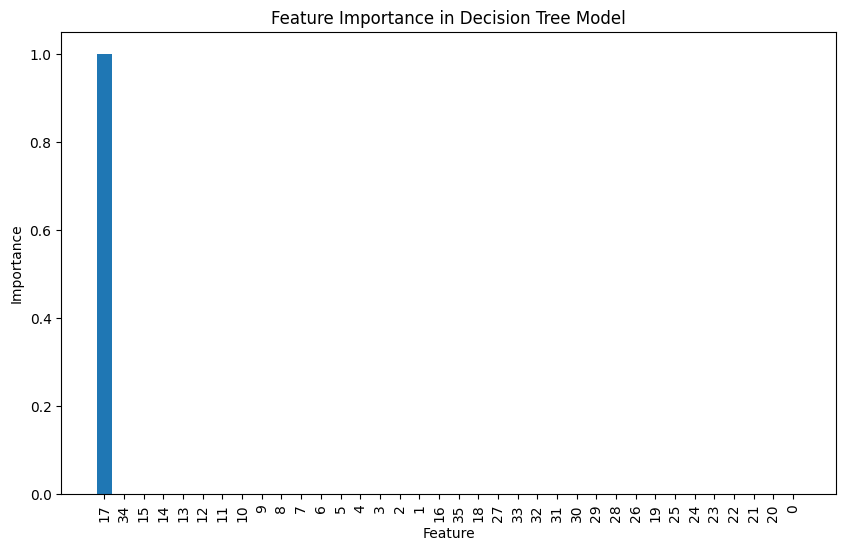

In [14]:
# 특성 중요도 확인
model = DecisionTreeClassifier(random_state=42)
model.fit(X_scaled, y)

feature_importance = model.feature_importances_

# 중요도를 내림차순으로 정렬하여 시각화
sorted_idx = feature_importance.argsort()[::-1]
plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), feature_importance[sorted_idx], align='center')
plt.xticks(range(X.shape[1]), X.columns[sorted_idx], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance in Decision Tree Model')
plt.show()

In [21]:
# 가장 효과가 좋은 n_estimators = 300 에서 feature importance 뽑아서 돌려보기
# 선택할 특성 인덱스 상위 5개 : 0.6865789473684211
selected_features_indices = [17]

X = data.drop(data.index[0])  # 첫 번째 행 삭제
X2 = X.iloc[:, selected_features_indices]  # 특성 데이터

X2_scaled = scaler.fit_transform(X2)

X2_train, X2_test, y_train, y_test = train_test_split(X2_scaled, y, test_size=0.2, random_state=42)
model = DecisionTreeClassifier(random_state=42)
model.fit(X2_train, y_train)

# 모델 평가
predictions = model.predict(X2_test)
accuracy = accuracy_score(y_test, predictions)
accuracy

1.0

In [15]:
# 가장 효과가 좋은 n_estimators = 300 에서 feature importance 뽑아서 돌려보기
# 선택할 특성 인덱스 상위 5개 : 0.6865789473684211
selected_features_indices = [1, 17, 0 , 16, 14]

X = data.drop(data.index[0])  # 첫 번째 행 삭제
X2 = X.iloc[:, selected_features_indices]  # 특성 데이터

X2_scaled = scaler.fit_transform(X2)

X2_train, X2_test, y_train, y_test = train_test_split(X2_scaled, y, test_size=0.2, random_state=42)
model = DecisionTreeClassifier(random_state=42)
model.fit(X2_train, y_train)

# 모델 평가
predictions = model.predict(X2_test)
accuracy = accuracy_score(y_test, predictions)
accuracy

1.0

In [16]:
# 선택할 특성 인덱스 상위 10개 :0.7476315789473684
selected_features_indices = [1, 17, 0 , 16, 14, 18, 10, 21, 13, 4, 15, 35, 3, 28, 20]

X = data.drop(data.index[0])  # 첫 번째 행 삭제
X2 = X.iloc[:, selected_features_indices]  # 특성 데이터

X2_scaled = scaler.fit_transform(X2)

X2_train, X2_test, y_train, y_test = train_test_split(X2_scaled, y, test_size=0.2, random_state=42)
model = DecisionTreeClassifier(random_state=42)
model.fit(X2_train, y_train)

# 모델 평가
predictions = model.predict(X2_test)
accuracy = accuracy_score(y_test, predictions)
accuracy

1.0

In [17]:
# 선택할 특성 인덱스 상위 15개 : 0.7323684210526316
selected_features_indices = [1, 17, 0 , 16, 14, 18, 10, 21, 13, 4]

X = data.drop(data.index[0])  # 첫 번째 행 삭제
X2 = X.iloc[:, selected_features_indices]  # 특성 데이터

X2_scaled = scaler.fit_transform(X2)

X2_train, X2_test, y_train, y_test = train_test_split(X2_scaled, y, test_size=0.2, random_state=42)
model = DecisionTreeClassifier(random_state=42)
model.fit(X2_train, y_train)

# 모델 평가
predictions = model.predict(X2_test)
accuracy = accuracy_score(y_test, predictions)
accuracy

1.0

In [18]:
# 선택할 특성 인덱스 상위 20개 : 0.7881578947368421
selected_features_indices = [1, 17, 0 , 16, 14, 18, 10, 21, 13, 4, 15, 35, 3, 28, 20, 5, 7, 22, 6, 2]

X = data.drop(data.index[0])  # 첫 번째 행 삭제
X2 = X.iloc[:, selected_features_indices]  # 특성 데이터

X2_scaled = scaler.fit_transform(X2)

X2_train, X2_test, y_train, y_test = train_test_split(X2_scaled, y, test_size=0.2, random_state=42)
model = DecisionTreeClassifier(random_state=42)
model.fit(X2_train, y_train)

# 모델 평가
predictions = model.predict(X2_test)
accuracy = accuracy_score(y_test, predictions)
accuracy

1.0

In [19]:
# 선택할 특성 인덱스 상위 25개 : 0.7928947368421052
selected_features_indices = [1, 17, 0 , 16, 14, 18, 10, 21, 13, 4, 15, 35, 3, 28, 20, 5, 7, 22, 6, 2,  27, 26, 8, 11, 25]

X = data.drop(data.index[0])  # 첫 번째 행 삭제
X2 = X.iloc[:, selected_features_indices]  # 특성 데이터

X2_scaled = scaler.fit_transform(X2)

X2_train, X2_test, y_train, y_test = train_test_split(X2_scaled, y, test_size=0.2, random_state=42)
model = DecisionTreeClassifier(random_state=42)
model.fit(X2_train, y_train)

# 모델 평가
predictions = model.predict(X2_test)
accuracy = accuracy_score(y_test, predictions)
accuracy

1.0

In [20]:
# 선택할 특성 인덱스 상위 30개 :0. 7863157894736842
selected_features_indices = [1, 17, 0 , 16, 14, 18, 10, 21, 13, 4, 15, 35, 3, 28, 20, 5, 7, 22, 6, 2,  27, 26, 8, 11, 25, 19, 23, 12, 31, 29, 32, 30, 9, 33, 34]

X = data.drop(data.index[0])  # 첫 번째 행 삭제
X2 = X.iloc[:, selected_features_indices]  # 특성 데이터

X2_scaled = scaler.fit_transform(X2)

X2_train, X2_test, y_train, y_test = train_test_split(X2_scaled, y, test_size=0.2, random_state=42)
model = DecisionTreeClassifier(random_state=42)
model.fit(X2_train, y_train)

# 모델 평가
predictions = model.predict(X2_test)
accuracy = accuracy_score(y_test, predictions)
accuracy

1.0